In [1]:
import networkx as nx
import numpy as np
from scipy import stats
import scipy as sp
import warnings
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('axes', axisbelow=True)

In [72]:
def modified_shannon_entropy(G, f, removal='random',
                             ntimes=10, return_stdv=False):
    """
    After a fraction, f, nodes have been 'removed' from the network (i.e., they
    have become disconnected isolates, such that the number of nodes does not
    change), this measure corresponds to the entropy of the distribution of
    component sizes, P(C). That is, P(c_i) corresponds to the probability that
    a randomly selected node will be in component c_i; there is a higher
    probability that a randomly-selected node will be in larger components.

    Parameters
    ----------
    G (nx.Graph):
        the graph in question.

    f (float):
        the fraction of N nodes in the network to be removed.

    removal (str):
        the method by which nodes are removed from the network.

    ntimes (int):
        the number of times to remove nodes to compute the mean entropy.

    return_stdv (bool):
        if True, this function returns a mean entropy as well as the standard
        deviation of the entropy after running ntimes. if False, this function
        just returns the mean value for the entropy.

    Returns
    -------
    H_msh_mean (float):
        the modified Shannon entropy averaged over ntimes runs. if return_stdv,
        this function also returns H_msh_stdv.

    """
    H_msh_mean = []
    for _ in range(ntimes):
        out_H = []
        N = G.number_of_nodes()
        leading_term = -1 / np.log2(N)
        p_i_unif = 1 / N

        G_f = G.copy()

        if removal == 'random':
            remove_nodes = [i for i in G_f.nodes() if np.random.rand() < f]

        else:
            warnings.warn("Only implemented for *random*. switching to that.")
            remove_nodes = [i for i in G_f.nodes() if np.random.rand() < f]

        curr = 0

        if len(remove_nodes):
            for node_r in remove_nodes:
                G_f.remove_node(node_r)
                curr += p_i_unif * np.log2(p_i_unif)

        Cs = list(nx.connected_components(G_f))
        for Ci in Cs:
            p_i = len(Ci) / N
            curr += p_i * np.log2(p_i)

        out_H.append(curr)

        H_msh = np.abs(leading_term * np.sum(out_H))
        H_msh_mean.append(H_msh)

    H_msh_mean = np.array(H_msh_mean).mean()

    if return_stdv and ntimes > 4:
        H_msh_stdv = np.array(H_msh_mean).mean()
        return H_msh_mean, H_msh_stdv

    else:
        return H_msh_mean

In [79]:
G = nx.karate_club_graph()
Hout_m = []
Hout_s = []
niter = 1000
rate = 101
rates = np.linspace(0,1,rate)
for f in rates:
    Hsm, Hss = modified_shannon_entropy(G, f, removal='random', ntimes=niter, return_stdv=True)
#     Hs = modified_shannon_entropy(G, f, removal='random', ntimes=niter)
    Hout_m.append(Hsm)
    Hout_s.append(Hss)
    
means = np.array(Hout_m)
stdvs = np.array(Hout_s)
    

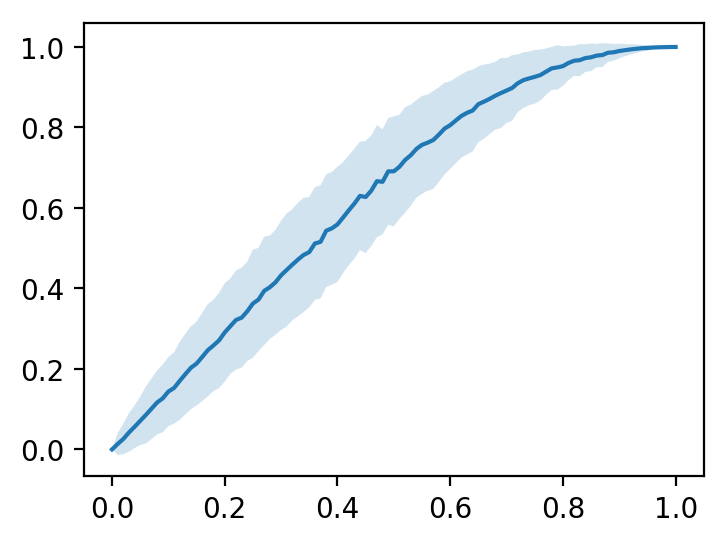

In [78]:
plt.figure(figsize=(4,3),dpi=200)

plt.plot(rates, means)
plt.fill_between(rates, means-stdvs, means+stdvs, alpha=0.2)

plt.show()

In [ ]:
niters = [10,20,50,100,200,500]
niter = 100
rate_max = 201
rate_min = 11
n_rates = 20
# range_rates = np.linspace(rate_min, rate_max, n_rates, dtype=int)
range_rates = np.arange(10,202,2,dtype=int)
r_outs = {}
test_means = []
test_stdvs = []
test = []
for r in range_rates:
    print("%03i"%r, dt.datetime.now())
    Hout_m = []
    Hout_s = []
    rates = np.linspace(0, 1, r)
    for f in rates:
        Hsm, Hss = modified_shannon_entropy(G, f, removal='random', ntimes=niter, return_stdv=True)
        Hout_m.append(Hsm)
        Hout_s.append(Hss)

    means = np.array(Hout_m)
    stdvs = np.array(Hout_s)
    test_means.append(means)
    test_stdvs.append(stdvs)
    test.append(1 - sum(means)/r)

test_means = np.array(test_means)
test_stdvs = np.array(test_stdvs)
test = np.array(test)

010 2020-02-04 12:39:56.611631
012 2020-02-04 12:39:57.028287
014 2020-02-04 12:39:57.515142
016 2020-02-04 12:39:58.070449
018 2020-02-04 12:39:58.741503
020 2020-02-04 12:39:59.408452
022 2020-02-04 12:40:00.183278
024 2020-02-04 12:40:01.030375
026 2020-02-04 12:40:01.959000
028 2020-02-04 12:40:02.964908
030 2020-02-04 12:40:04.034937
032 2020-02-04 12:40:05.135497
034 2020-02-04 12:40:06.347203
036 2020-02-04 12:40:07.712712
038 2020-02-04 12:40:09.122664
040 2020-02-04 12:40:10.621080
042 2020-02-04 12:40:12.117529
044 2020-02-04 12:40:13.637326
046 2020-02-04 12:40:15.284612
048 2020-02-04 12:40:16.974444
050 2020-02-04 12:40:18.773258
052 2020-02-04 12:40:20.740839
054 2020-02-04 12:40:22.688295
056 2020-02-04 12:40:24.718806
058 2020-02-04 12:40:26.806912
060 2020-02-04 12:40:28.920691
062 2020-02-04 12:40:31.177786
064 2020-02-04 12:40:33.553155
066 2020-02-04 12:40:35.912951
068 2020-02-04 12:40:38.419612
070 2020-02-04 12:40:40.966216
072 2020-02-04 12:40:43.568637
074 2020

In [ ]:
plt.figure(figsize=(4,3),dpi=200)
for ri, r in enumerate(range_rates):
    plt.plot(range_rates, test_means[ri], linewidth=0.25, color='#999999')
plt.show()

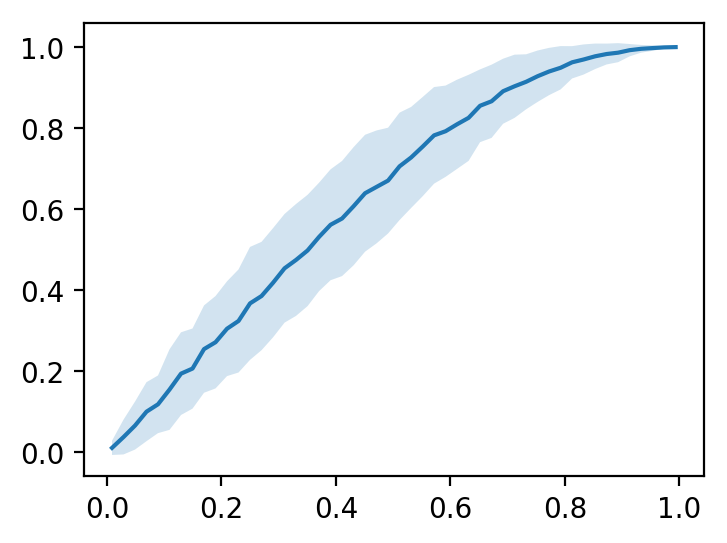

In [158]:
plt.figure(figsize=(4,3),dpi=200)
every_n = 4
xvals, yvals = average_every_n(rates, means, every_n)
xvals_std, yvals_std = average_every_n(rates, stdvs, every_n)

plt.plot(xvals, yvals)
plt.fill_between(xvals_std, yvals-yvals_std, yvals+yvals_std, alpha=0.2)

plt.show()

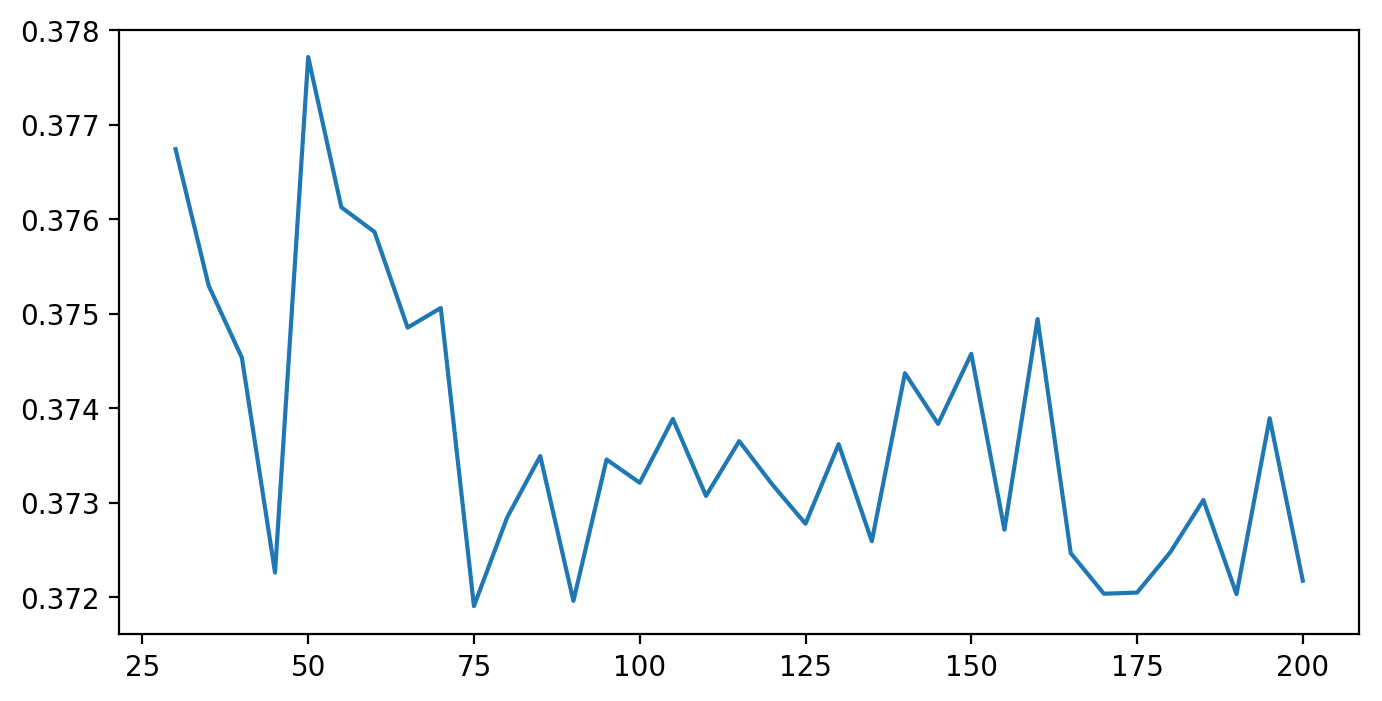

In [154]:
plt.figure(dpi=200,figsize=(8,4))
xvals, yvals = average_every_n(range_rates, r_outs[niter], 1)
plt.plot(xvals, yvals)

# plt.legend()
plt.show()

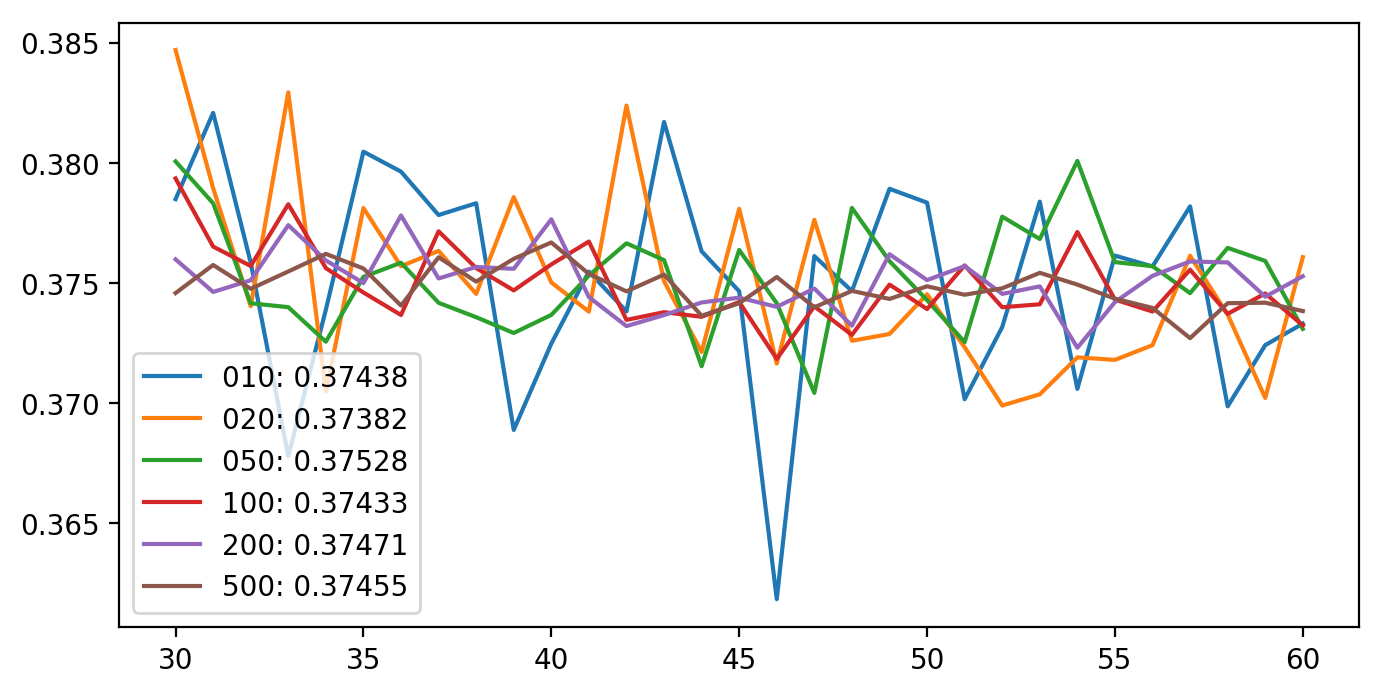

In [144]:
plt.figure(dpi=200,figsize=(8,4))
for niter in niters:
    xvals, yvals = average_every_n(range_rates, r_outs[niter], 1)
    plt.plot(xvals, yvals, label="%03i: %.5f"%(niter, np.mean(r_outs[niter][10:])))

plt.legend()
plt.show()

In [ ]:

for f in rates:
    Hsm, Hss = modified_shannon_entropy(G, f, removal='random', ntimes=100, return_stdv=True)
    Hout_m.append(Hsm)
    Hout_s.append(Hss)


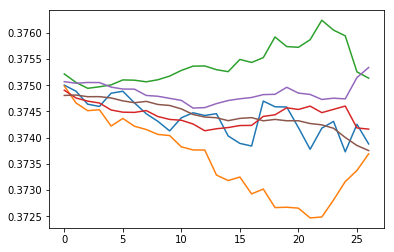

In [147]:
for niter in niters:
    plt.plot([np.mean(r_outs[niter][i:]) for i in range(len(r_outs[niter])-4)])

In [132]:
def average_every_n(xvec, yvec, n=2):
    """
    Utility function that spits out a smoothed x and y vector
    
    Parameters
    ----------
    xvec, yvec (np.array): vectors of x and y data
    n (int): average every n terms together
    
    Returns
    -------
    out_x, out_y (np.array): two smoothed vectors according to
                             however many n were specified
    """
    
    out_x = []
    out_y = []
    
    min_xdiff = xvec[1] - xvec[0]
    
    for i in range(0,len(xvec),n):
        xnumerat = 0
        ynumerat = 0
        
        if i + n <= len(xvec):
            for j in range(n):
                xnumerat += xvec[i+j]
                ynumerat += yvec[i+j]
        
            out_x.append(xnumerat / n)
            out_y.append(ynumerat / n)
    
    out_x = np.array(out_x)
    out_y = np.array(out_y)

    if n > 1:
        out_x = out_x + min_xdiff / n
    
    return out_x, out_y


In [30]:
import time

In [43]:
A = np.random.rand(1000)

In [44]:
niter = 10000
diffs_1 = []
for i in range(niter):
    start = time.perf_counter()
    softmax(A)
    end = time.perf_counter()
    diffs_1.append(end-start)

In [45]:
A = np.atleast_2d(A)
diffs_2 = []
for i in range(niter):
    start = time.perf_counter()
    x = sp.special.logsumexp(A,axis=0)
    x / x.sum()
    end = time.perf_counter()
    diffs_2.append(end-start)

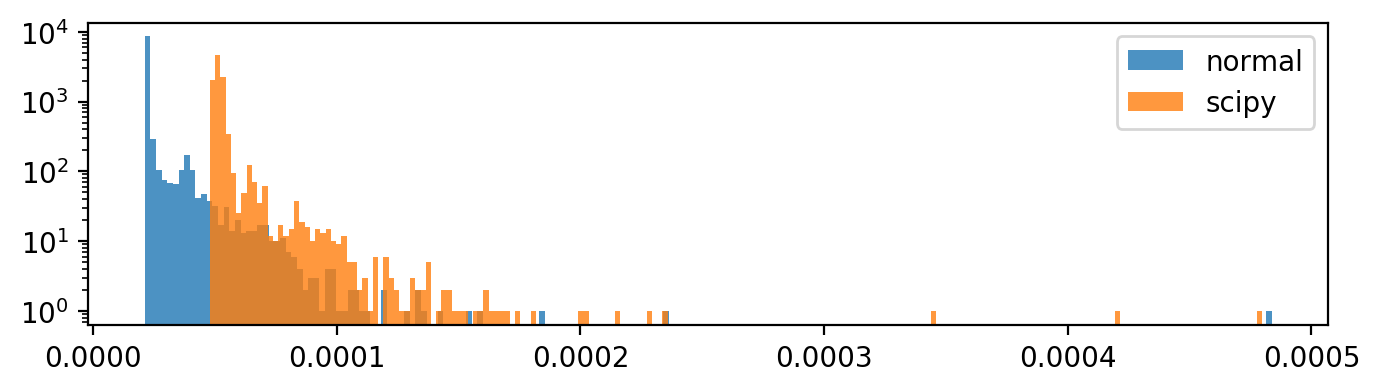

In [46]:
fig, ax = plt.subplots(1,1,figsize=(8,2),dpi=200)
ax.hist(diffs_1, bins=200, alpha=0.8, label='normal')
ax.hist(diffs_2, bins=200, alpha=0.8, label='scipy')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

In [ ]:
import cmocean as cmo
from matplotlib import gridspec
import matplotlib

N = 48
G = nx.random_geometric_graph(N,0.3)
while not nx.is_connected(G):
    G = nx.random_geometric_graph(N,0.3)
    
pos_i = nx.kamada_kawai_layout(G)

xcoords = np.array([i[0] for i in pos_i.values()])
ycoords = np.array([i[1] for i in pos_i.values()])

ew = 1
ns = 15
nrows = 4
ncols = 6
rs = 1
cols = cmo.cm.thermal(np.linspace(0.5,0.9,ncols))
fs = np.round(np.linspace(0,1,ncols),2)
plt.figure(dpi=300, figsize=(9,9))

gs = gridspec.GridSpec(nrows, ncols, width_ratios=[1]*ncols, height_ratios=[1.5, 1, 2, 1])
G_f = G.copy()
remove_nodes = []

for i in range(ncols):
    axi = plt.subplot(gs[i])
    f = fs[i]
    fx = f
    if i > 0:
        fx = fx*0.8
    
    if i == ncols-1:
        fx = f
        
    remove_nodes_i = [i for i in G_f.nodes() if np.random.rand() < fx]
    
    if len(remove_nodes_i):
        for node_r in remove_nodes_i:
            remove_nodes.append(node_r)
            G_f.remove_node(node_r)
            G_f.add_node(node_r)
    
    remove_nodes = list(set(remove_nodes))
    Cs = sorted(list(nx.connected_components(G_f)),key=len,reverse=True)
    vals = list(range(len(G)))
    counts = [0]*len(vals)
    for j,Ci in enumerate(Cs):
        counts[j] += len(Ci) / G.number_of_nodes()
    
    nc = cols[i]
    nodelist = [i for i in G.nodes() if i not in remove_nodes]
    nx.draw_networkx_nodes(G_f,pos_i,nodelist=nodelist,node_size=ns*1.1,edgecolors='#333333',
                           linewidths=1,node_color=[nc],ax=axi)
    nx.draw_networkx_edges(G_f,pos_i,width=ew,edge_color='#999999',ax=axi,alpha=0.9)
    
    if i==0:
        axi.text(-0.45, 0.55,'Node removal\n$G_{f}$',fontsize=10,transform=axi.transAxes,
             verticalalignment='center',horizontalalignment='center',clip_on=False,rotation=90)
        axi.text(-0.58, 0.99,'A',fontsize=12,transform=axi.transAxes,fontweight='semibold',
             verticalalignment='center',horizontalalignment='left',clip_on=False)
        
    axi.set_xticks([])
    axi.set_yticks([])

    yvals = np.linspace(min(ycoords)*2.0,max(ycoords*1.1),20)
    xvals = np.linspace(min(xcoords)*1.1,max(xcoords*1.2),9)
    
    for iso in range(len(remove_nodes)):
        yv = yvals[1 + int(iso/8)]
        xv = xvals[1 + (iso%7)]
        axi.scatter([xv],[yv],c=[cols[i]],s=ns/1.1,edgecolors=['#333333'])

    axi.set_ylim(min(yvals)*1.1,max(yvals))
    axi.set_xlim(min(xvals),max(xvals))
    axi.set_axis_off()

    ##############################################################
    axi = plt.subplot(gs[i+ncols])
    axi.tick_params(axis='both', which='major', labelsize=6)
    
    ent = np.abs(np.round(modified_shannon_entropy(G,f),3))
    lab = '$H_{msh}(P(c_i))=%.2f$'%ent
    axi.set_xticks([])
    axi.set_yticks([])

    if i==0:
        lab = '$H_{msh}(P(c_i))=%.2f$\n(min entropy)'%ent
        axi.set_ylabel('Size distribution\n$P(c_i)$',fontsize=10)
        axi.set_yticks(np.linspace(0,1,3))
        axi.tick_params(axis='both', which='major', labelsize=9)
        axi.text(-0.58, 1.25,'B',fontsize=12,transform=axi.transAxes,fontweight='semibold',
             verticalalignment='center',horizontalalignment='left',clip_on=False)

    if i==ncols-1:
        lab = '$H_{msh}(P(c_i))=%.2f$\n(max entropy)'%ent

    else:
        maxb = max(counts)
        axi.arrow(0.8, 1.115, 0.4, 0, head_width=0.07, head_length=0.08, width=0.008,
                  fc=cols[i], ec=cols[i],transform=axi.transAxes,clip_on=False)
        axi.arrow(0.8, 1.115, 0.4, 0, head_width=0.07, head_length=0.08, width=0.008,
                  fc='w', ec='w',transform=axi.transAxes,clip_on=False,alpha=0.2)
        
    maxy = np.linspace(1.02,0.4,ncols)
    axi.set_ylim(0,maxy[i])
    axi.bar(vals,counts,color=cols[i],width=2,edgecolor='#333333',linewidth=0.5, label=lab)
    
    axi.text(0.175,0.9,lab,fontsize=7,transform=axi.transAxes,color='#525252',
             verticalalignment='top',horizontalalignment='left')

    axi.set_xlim(-2,G.number_of_nodes()+1)
    axi.spines['top'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.set_title('$f = %.1f$'%f, fontsize=9,y=1)#0.97)
    
    ##############################################################

rate = 30
ents = resilience(G,ntimes=500,rate=rate)
xents = np.linspace(0,1,len(ents))
axi = plt.subplot(gs[nrows-2,:])
cols = cmo.cm.thermal(np.linspace(0.4,0.9,len(ents)))

for i in range(len(ents)-1):
    axi.plot([xents[i],xents[i+1]], [ents[i],ents[i+1]], color=cols[i], linewidth=3.0)

axi.annotate("", xy=(0.34, 0.75), xytext=(0.39, 0.55), transform=axi.transAxes,
             arrowprops=dict(shrink=0.1, ec='#808080',fc='w',lw=1.2))
axi.text(0.35, 0.755,'less resilient',fontsize=10,transform=axi.transAxes,color='#525252',
             verticalalignment='bottom',horizontalalignment='right')

axi.annotate("", xy=(0.47, 0.25), xytext=(0.42, 0.45), transform=axi.transAxes,
             arrowprops=dict(shrink=0.1, ec='#808080',fc='w',lw=1.2))
axi.text(0.445, 0.2375,'more resilient',fontsize=10,transform=axi.transAxes,color='#525252',
             verticalalignment='top',horizontalalignment='left')

axi.set_xticks(np.linspace(0,1,6))
axi.set_yticks(np.linspace(0,1,3))
axi.set_xlabel('Fraction of nodes removed, $f$',fontsize=10)
axi.set_ylabel('Shannon diversity\n$H_{msh}(P(c_i))$',fontsize=10)
axi.set_xlim(-0.005,1.005)
axi.set_ylim(-0.018,1.018)
axi.grid(linewidth=2.0,color='#999999',alpha=0.2)
axi.tick_params(axis='both', which='major', labelsize=9)
axi.set_title('Isolated components ($c_i$)',fontsize=10,y=1.025)
axi.text(-0.09, 0.96,'C',fontsize=12,transform=axi.transAxes,fontweight='semibold',
     verticalalignment='center',horizontalalignment='left',clip_on=False)

axi.text(0.8025, 0.85, "Resilience = %.3f"%(1-sum(ents/rate)),
         fontsize=10,transform=axi.transAxes,color='#525252',
         verticalalignment='center',horizontalalignment='left')


#######################################
# Ludvig do shit here pleease
axi = plt.subplot(gs[nrows-1,:])
axi.plot(np.linspace(0,20,21), np.linspace(0,1,21))

axi.text(-0.09, 0.96,'D',fontsize=12,transform=axi.transAxes,fontweight='semibold',
     verticalalignment='center',horizontalalignment='left',clip_on=False)

axi.grid(linewidth=2.0,color='#999999',alpha=0.2)
axi.tick_params(axis='both', which='major', labelsize=9)
axi.set_xlim(-0.1,20.1)

# Ludvig do shit here pleease
#######################################

plt.subplots_adjust(wspace=0.1,hspace=0.185)

# plt.savefig("../figs/pngs/resilience_intro_presilience.png", dpi=600, bbox_inches='tight')
# plt.savefig("../figs/pdfs/resilience_intro_presilience.pdf", bbox_inches='tight')

plt.show()